In [1]:
import numpy as np
import pyvpic
from dataframework.src.datasets.vpicdataset import VPICDataset
from scipy.ndimage import gaussian_filter

### Get ex variable using pyvpic directly

In [2]:
datfile = '/tigress/kendrab/01292021/data.h5'
viewer = pyvpic.open(datfile)
print(viewer.datasets)
time, z, y, x = viewer.get_grid('field/bx')
print(time[:])
true_ex = np.squeeze(viewer['field/ex'][:])
print(viewer['field/bx'][:].shape)
print(true_ex.shape)

['electron/n', 'electron/pxx', 'electron/pxy', 'electron/pyy', 'electron/pyz', 'electron/pzx', 'electron/pzz', 'electron/vx', 'electron/vy', 'electron/vz', 'field/bx', 'field/by', 'field/bz', 'field/ex', 'field/ey', 'field/ez', 'field/jx', 'field/jy', 'field/jz', 'field/rhob', 'field/rhof', 'ion/n', 'ion/pxx', 'ion/pxy', 'ion/pyy', 'ion/pyz', 'ion/pzx', 'ion/pzz', 'ion/vx', 'ion/vy', 'ion/vz']
[9.01765376e-03 9.99155998e+00 1.99831200e+01 2.99746799e+01
 3.99662399e+01 4.99578018e+01 5.99493599e+01 6.99409180e+01
 7.99324799e+01 8.99240417e+01 9.99156036e+01 1.09907166e+02
 1.19898720e+02 1.29890289e+02 1.39881836e+02 1.49873398e+02
 1.59864960e+02 1.69856522e+02]
(18, 2660, 1, 666)
(18, 2660, 666)


### Get ex variable using data framework

In [3]:
files = ['/tigress/kendrab/01292021/data.h5','tigress/kendrab/01292021/info']
kwargs = {'get_vars' : ['ex','bx','by','bz','jy']}
data_01292021 = VPICDataset(vpicfiles=files, **kwargs)
test_ex = data_01292021.variables['ex'].data

NO PARAMS ADDED, FUNCTIONALIITY NOT ADDED YET!!!! SORRY
Added ex Variable
Added bx Variable
Added by Variable
Added bz Variable
Added jy Variable


### Test if they two ex vars are the same (put into unit testing eventually?)

In [4]:
print(np.all(true_ex == test_ex))

True


### Try slicing the data, unittest style
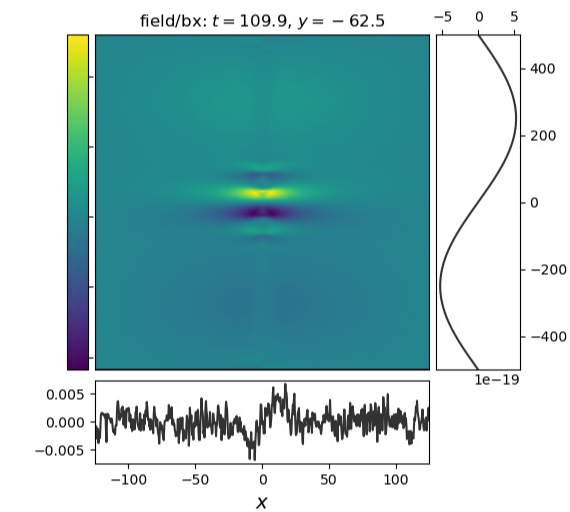

In [5]:
# test the timeslice
dset_time = data_01292021.ndslice(timelims=[80,130])
print(dset_time.timeseries)
print(len(dset_time.timeseries))
print(dset_time.variables['ex'].data.shape)

[ 89.92404   99.9156   109.907166 119.89872  129.89029 ]
5
(5, 2660, 666)


In [6]:
# test the zoom
dset_zoom = data_01292021.ndslice(zooms=np.array([[131, -28], [-39.8, 36.4]]))
print(len(dset_zoom.timeseries))
for i in range(len(dset_zoom.default_mesh)):
    print(min(dset_zoom.default_mesh[i]),max(dset_zoom.default_mesh[i]))
    print(len(dset_zoom.default_mesh[i]))
print(dset_zoom.variables['ex'].data.shape)

18
-27.81955 130.82707
423
-39.78979 36.036037
203
(18, 423, 203)


In [7]:
# test the spaceslice
dset_slice = data_01292021.ndslice(zooms=np.array([[-28, 131], [-39.8, 36.4]]), set_pts=[np.array([-28, -39.8]), np.array([131, 36.4])])
print(dset_slice.timeseries)
print(dset_slice.default_mesh[0][0], dset_slice.default_mesh[0][-1])
print(len(dset_slice.timeseries))
print(dset_slice.variables['ex'].data.shape)
print(data_01292021.variables['ex'].data.shape)


[9.01765376e-03 9.99155998e+00 1.99831200e+01 2.99746799e+01
 3.99662399e+01 4.99578018e+01 5.99493599e+01 6.99409180e+01
 7.99324799e+01 8.99240417e+01 9.99156036e+01 1.09907166e+02
 1.19898720e+02 1.29890289e+02 1.39881836e+02 1.49873398e+02
 1.59864960e+02 1.69856522e+02]
0.32541630273542044 175.13766644006452
18
(18, 466)
(18, 2660, 666)


In [8]:
# Throw it all together for a relevant plot
dt = data_01292021.timeseries[1]-data_01292021.timeseries[0]
desired_time = 110
timelims = [110-dt/2,110+dt/2]
new_dset = data_01292021.ndslice(timelims = timelims, zooms=np.array([[-28, 131], [-39.8, 36.4]]),
                                 set_pts=[np.array([-28, -39.8]), np.array([131, 36.4])])

In [9]:
%matplotlib widget

import matplotlib.pyplot as plt

plt.plot(new_dset.variables['bx'].mesh[0], new_dset.variables['bx'].data[0,:], label='original_data')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
# let's check out some gaussian filtering

for i in range(10):
    smooth_data = gaussian_filter(new_dset.variables['bx'].data[0,:], i)
    plt.plot(new_dset.variables['bx'].mesh[0], smooth_data, label=f'gaussian filter sigma={i}')
    
plt.legend()
plt.show()

In [12]:
%run 1d_sampling.ipynb
random_bounded(np.array([[3,4],[5,6]]))

NO PARAMS ADDED, FUNCTIONALIITY NOT ADDED YET!!!! SORRY
Added bx Variable
Added by Variable
Added bz Variable
Added jy Variable
Finding structures at simulation time 309.89697265625
parameter d_per_de = 4
Added bz_smooth Variable
Added bx_smooth Variable
Added flux_fn Variable
Number of nulls:  46
parameter x_coords = [[ 114.97886056  178.42360713]
 [ 318.49994352  186.67419156]
 [ 588.28429281  165.17121359]
 [ 833.6854744   153.18075265]
 [1021.79858523  145.09320903]
 [1273.45605448  164.75710861]
 [1542.02943115  190.36864923]
 [1464.09212635  150.45679052]
 [1550.82189342  216.56050568]
 [1379.07706725  205.0737245 ]
 [4391.58249611  173.56437832]
 [5487.93240191  176.58871828]
 [7191.34066627  175.71995566]
 [7206.04018472  175.90010716]
 [7239.92367879  171.97792374]
 [7294.40415335  170.48507449]
 [7438.98319144  187.63852332]
 [7551.93398553  174.02999643]
 [7730.79265274  191.32104545]
 [8055.25046227  196.7431513 ]
 [8273.85461172  215.79643651]
 [8586.85965862  167.91299759

array([3.9098356 , 5.04247713])